In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
np.random.seed(100)
X_train = pd.DataFrame({'x':[206]*5 + [194] + [6]*4,
                   'y': list(np.random.randint(100, 400, 6)) + [299, 299, 301, 301]})
X_train

,x,y
0,206,108
1,206,380
2,206,179
3,206,153
4,206,166
5,194,326
6,6,299
7,6,299
8,6,301
9,6,301


In [3]:
target_train = pd.Series([10]*5 + [20] + [50]*2 + [30]*2)
target_train.name = 't'
target_train

0    10
1    10
2    10
3    10
4    10
5    20
6    50
7    50
8    30
9    30
Name: t, dtype: int64

In [4]:
tree_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state = 100)
tree_model.fit(X=X_train, y=target_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=2, random_state=100)

[Text(0.5, 0.8333333333333334, 'x[0] <= 100.0\nabsolute_error = 13.0\nsamples = 10\nvalue = 15.0'),
 Text(0.25, 0.5, 'x[1] <= 300.0\nabsolute_error = 10.0\nsamples = 4\nvalue = 40.0'),
 Text(0.125, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.375, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 2\nvalue = 30.0'),
 Text(0.75, 0.5, 'x[0] <= 200.0\nabsolute_error = 1.667\nsamples = 6\nvalue = 10.0'),
 Text(0.625, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.875, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 5\nvalue = 10.0')]

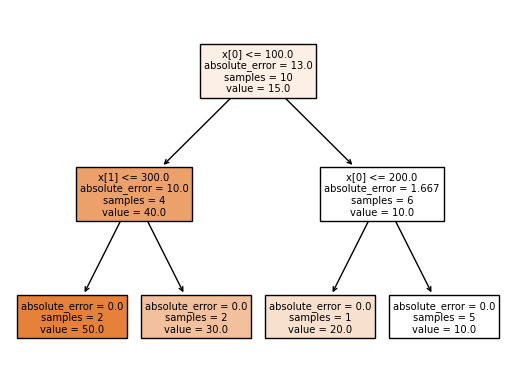

In [5]:
plot_tree(tree_model, filled=True)

[[-15.   2.]
 [-11.  -2.]
 [-15.   2.]
 [-15.   2.]
 [-15.   2.]
 [ -1.  -2.]
 [ 20.   7.]
 [ 20.   7.]
 [ 14.  -7.]
 [ 14.  -7.]]


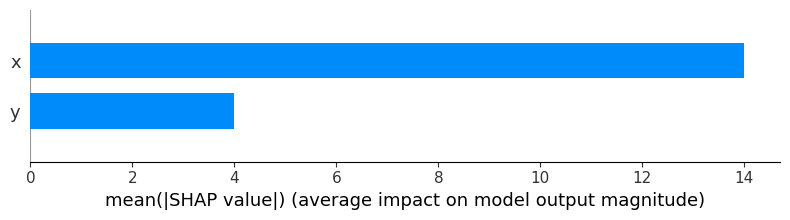

In [6]:
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_train)
print(shap_values)
shap.summary_plot(shap_values, X_train, plot_type="bar")

[[-5.  2.]
 [20.  7.]]


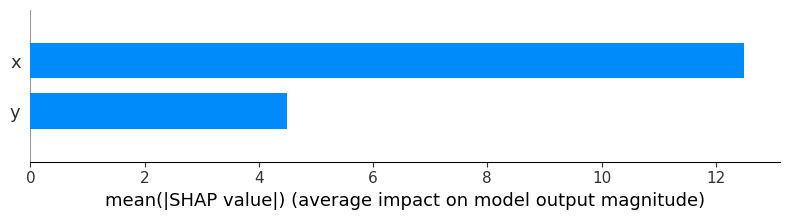

In [7]:
X_test = pd.DataFrame({'x': [150, 80], 'y': [75, 200]})
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)
print(shap_values)
shap.summary_plot(shap_values, X_test, plot_type="bar")